In [ ]:
# oligomer -ff ff.dat -un 2 m01.dat
# ffmaker 1x2h.pdb 3a7r.pdb dimer.pdb -smin 0.0 -smax 0.5 -ns 501 -o ff.dat
# oligomer -ff ff.dat -un 2 m01.dat

In [ ]:
import os

input_files = []
skip_files = []
for root, dirs, files in os.walk("./For_Oligomer_Analysis_v2", topdown=False):
    for name in files:
        fp = os.path.join(root, name)
        print(fp)

        if "For_Oligomer_Analysis" in fp and fp.endswith(".dat"):
            input_files.append(fp)
        else:
            skip_files.append(fp)

./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/S3_50ul_2s_038_plot_data.txt
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_325-329.dat
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/S3_50ul_2s_038_UV_data.txt
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_300-304.dat
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_330-334.dat
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/edge_1__Ave_S3_50ul_2s_038_0_335-339.dat
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_285-289.dat
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_305-309.dat
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_290-294.dat
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_320-324.dat
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/edge_3__Ave_S3_50ul_2s_038_0_270-274.dat
./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_

In [ ]:
def dat_filename_append(input_fp, append):
    if input_fp.endswith(".dat"):
        return input_fp[:-4] + f"_{append}" + ".dat"
    else:
        raise ValueError("Incorrect input filepath!")

In [ ]:
def get_sample_name(input_fp):
    fp = os.path.basename(input_fp)
    fp_filt = fp.split("__")[-1]
    fp_split = fp_filt.split("_")
    # fp_split = [x for x in fp_split if len(x) > 0]

    return "_".join(fp_split[:-2])

In [ ]:
# check sample names cover whole set
# sample_names = []
# for input_file in input_files:
#     sample_names.append(get_sample_name(input_file))

# sample_names = set(sample_names)

# counter = {k: [] for k in input_files}
# for sn in sample_names:
#     for input_file in input_files:
#         if sn in input_file:
#             counter[input_file].append(sn)

# print(len(input_files))

In [4]:
import os

import numpy as np
import pandas as pd

trim_dict = {
    "input_filename": [],
    "trimmed_filename": [],
    "trim_start": [],
    "trim_end": [],
}

min_rows_to_remove = 6
end_threshold = 0.4

max_thresh = 0.8

input_files_trimmed = []
out_dir = "./oligomer_outputs_trimstart/trimmed/"
os.makedirs(out_dir, exist_ok=True)

for fp in input_files:
    # date = fp.split("/")[2]
    date = fp.split("/")[2].split("_")[0]
    out_fp = os.path.basename(fp)
    out_fp = os.path.join(out_dir, date + "_" + dat_filename_append(out_fp, "trimmed"))

    df = pd.read_csv(fp, sep="\t", header=None)
    trim_idx = len(df)
    for i in range(len(df)):
        if df.iloc[i][0] > end_threshold:
            trim_idx = i
            break

    df_trimmed = df.iloc[:trim_idx]

    ivals = df_trimmed.iloc[:, 1]
    mv = np.max([0, ivals.max()])

    argm = ivals.argmax()
    for i in range(ivals.argmax()):
        if df_trimmed.iloc[i, 1] > max_thresh * mv:
            argm = i
            break

    nrows_to_remove = 35  # np.max([min_rows_to_remove, argm])
    df_trimmed = df_trimmed.iloc[nrows_to_remove:]

    trim_dict["input_filename"].append(fp)
    trim_dict["trimmed_filename"].append(out_fp)
    trim_dict["trim_start"].append(nrows_to_remove)
    trim_dict["trim_end"].append(trim_idx)

    df_trimmed.to_csv(out_fp, sep="\t", index=False, header=False)
    input_files_trimmed.append(out_fp)

pd.DataFrame(trim_dict).to_csv(os.path.join(out_dir, "..", "trim_record.csv"))

In [ ]:
os.path.dirname(out_dir)

'./oligomer_outputs_trimstart/trimmed'

In [ ]:
df.iloc[:, 1].tolist()

[14.6121,
 14.61469,
 17.88159,
 16.77617,
 18.30785,
 18.28158,
 18.1214,
 17.98709,
 17.84209,
 17.88625,
 17.87537,
 17.67247,
 17.66491,
 17.3711,
 17.48095,
 17.29702,
 17.23784,
 17.0781,
 16.8956,
 16.96712,
 16.86552,
 16.79553,
 16.39053,
 16.29208,
 16.36831,
 16.07484,
 16.0112,
 15.83112,
 15.74907,
 15.58545,
 15.48333,
 15.2978,
 15.21256,
 15.04249,
 14.80997,
 14.63769,
 14.56436,
 14.26132,
 14.10032,
 13.88461,
 13.88683,
 13.78624,
 13.50713,
 13.42702,
 13.2289,
 12.92934,
 12.74876,
 12.70163,
 12.58955,
 12.34679,
 12.23819,
 11.90339,
 11.81161,
 11.63114,
 11.54482,
 11.34211,
 11.10869,
 10.92648,
 10.82025,
 10.62741,
 10.51336,
 10.36185,
 10.07668,
 9.972084,
 9.883751,
 9.635802,
 9.510085,
 9.436014,
 9.255498,
 9.02172,
 8.890393,
 8.692539,
 8.559683,
 8.399179,
 8.336385,
 8.160102,
 7.968346,
 7.789523,
 7.738014,
 7.510344,
 7.415185,
 7.185234,
 7.160547,
 6.983897,
 6.844451,
 6.620081,
 6.551789,
 6.421325,
 6.305753,
 6.096159,
 6.071534,
 5.95757

In [ ]:
min_rows_to_remove = 1
np.max([min_rows_to_remove, df.iloc[:, 1].argmax()])

np.int64(1)

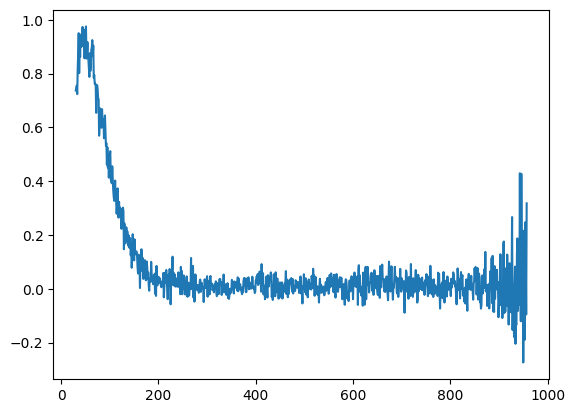

In [ ]:
fp = "./For_Oligomer_Analysis_v2/20250610_S2_10ul_015/edge_1__Ave_S2_10ul_015_0_285-289.dat"
fp = "./For_Oligomer_Analysis_v2/20240528_S1_70ul_2s_047/Ave_S1_70ul_2s_047_0_295-299.dat"
fp = "./For_Oligomer_Analysis_v2/20250725_S4_90ul_037/edge_2__Ave_S4_90ul_037_0_330-334.dat"
fp = "./For_Oligomer_Analysis_v2/20250610_S2_10ul_015/edge_2__Ave_S2_10ul_015_0_300-304.dat"

fp = "./For_Oligomer_Analysis_v2/20240528_S5_50ul_2s_035/Ave_S5_50ul_2s_035_0_330-334.dat"
fp = "./For_Oligomer_Analysis_v2/20250226_nS8_10ul_032/Ave_nS8_10ul_032_0_300-304.dat"
fp = "./For_Oligomer_Analysis_v2/20250226_nS5_10ul_029/Ave_nS5_10ul_029_0_310-314.dat"
fp = "./For_Oligomer_Analysis_v2/20250226_nS7_10ul_031/Ave_nS7_10ul_031_0_265-269.dat"
fp = "./For_Oligomer_Analysis_v2/20250610_S11_10ul_048/Ave_S11_10ul_048_0_285-289.dat"
fp = "./For_Oligomer_Analysis_v2/20250226_S4_10ul_023/Ave_S4_10ul_023_0_310-314.dat"
df = pd.read_csv(fp, sep="\t", header=None)
plt.plot(df[1][30:])

In [ ]:
tr = pd.read_csv("oligomer_outputs_trimstart/trim_record.csv")

In [ ]:
tr_filt = tr[~tr.input_filename.str.contains("edge")]

In [ ]:
tr_filt.sort_values("trim_start", ascending=False)

,Unnamed: 0,input_filename,trimmed_filename,trim_start,trim_end
366,366,./For_Oligomer_Analysis_v2/20250226_S4_10ul_02...,./oligomer_outputs_trimstart/trimmed/20250226_...,34,511
227,227,./For_Oligomer_Analysis_v2/20250226_nS8_10ul_0...,./oligomer_outputs_trimstart/trimmed/20250226_...,33,511
1170,1170,./For_Oligomer_Analysis_v2/20250226_nS5_10ul_0...,./oligomer_outputs_trimstart/trimmed/20250226_...,31,511
661,661,./For_Oligomer_Analysis_v2/20250226_nS2_30ul_0...,./oligomer_outputs_trimstart/trimmed/20250226_...,30,511
473,473,./For_Oligomer_Analysis_v2/20250226_nS2_10ul_0...,./oligomer_outputs_trimstart/trimmed/20250226_...,26,511
...,...,...,...,...,...
437,437,./For_Oligomer_Analysis_v2/20240528_S6_50ul_2s...,./oligomer_outputs_trimstart/trimmed/20240528_...,6,509
438,438,./For_Oligomer_Analysis_v2/20240528_S6_50ul_2s...,./oligomer_outputs_trimstart/trimmed/20240528_...,6,509
439,439,./For_Oligomer_Analysis_v2/20240528_S6_50ul_2s...,./oligomer_outputs_trimstart/trimmed/20240528_...,6,509
440,440,./For_Oligomer_Analysis_v2/20240528_S6_50ul_2s...,./oligomer_outputs_trimstart/trimmed/20240528_...,6,509


In [ ]:
df[1].argmax()

np.int64(410)

In [ ]:
k = 10
np.argpartition(df[1], -k)[-k:]

array([412, 383, 424, 431, 403, 438, 423, 407, 419, 410])

In [ ]:
input_files

['./For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_325-329.dat',
 './For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_300-304.dat',
 './For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_330-334.dat',
 './For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/edge_1__Ave_S3_50ul_2s_038_0_335-339.dat',
 './For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_285-289.dat',
 './For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_305-309.dat',
 './For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_290-294.dat',
 './For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_320-324.dat',
 './For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/edge_3__Ave_S3_50ul_2s_038_0_270-274.dat',
 './For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_315-319.dat',
 './For_Oligomer_Analysis_v2/20240528_S3_50ul_2s_038/Ave_S3_50ul_2s_038_0_280-284.dat',
 './For_Oligomer

In [ ]:
np.max(df[1])

np.float64(-26.04547)

In [ ]:
df[1][55]

np.float64(-19.26632)

In [ ]:
m - m * thresh

In [ ]:
thresh = 0.9
if m < 0:
    x > m(2 - thresh) 2m - m*thresh
if m > 0:
    x > thresh * m

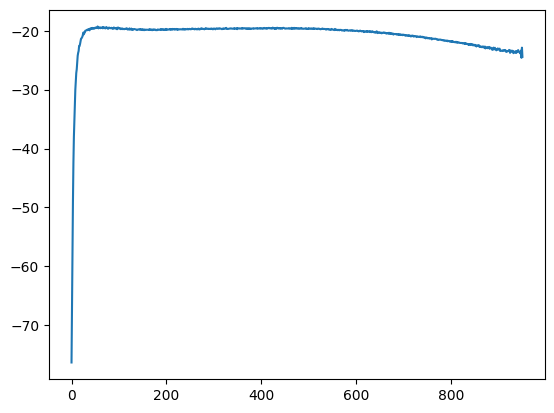

In [ ]:
plt.plot(df[1])

In [ ]:
out_dir = "./oligomer_outputs_trimstart/trimmed/"
os.makedirs(out_dir, exist_ok=True)

In [ ]:
import pandas as pd

In [ ]:
fp = input_files[0]

date = fp.split("/")[2].split("_")[0]
out_fp = os.path.basename(fp)
out_fp = os.path.join(out_dir, date + "_" + dat_filename_append(out_fp, "trimmed"))

df = pd.read_csv(fp, sep="\t", header=None)

In [ ]:
df[1].argmax()

np.int64(0)

In [ ]:
import numpy as np

np.argmax(df[1])

np.int64(0)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df

,0,1,2
0,0.010254,26.583760,4.035363
1,0.011021,20.792030,2.610532
2,0.011788,21.631680,1.836441
3,0.012555,21.628440,1.542573
4,0.013321,23.084350,1.559029
...,...,...,...
935,0.727126,-4.199699,2.219053
936,0.727893,-2.848558,2.130303
937,0.728660,1.235178,3.551531
938,0.729426,-3.404799,3.881032


In [ ]:
# import os

# import pandas as pd

# nrows_to_remove = 6
# end_threshold = 0.4

# input_files_trimmed = []
# out_dir = "./oligomer_outputs_trimstart/trimmed/"
# os.makedirs(out_dir, exist_ok=True)

# for fp in input_files:
#     # date = fp.split("/")[2]
#     date = fp.split("/")[2].split("_")[0]
#     out_fp = os.path.basename(fp)
#     out_fp = os.path.join(out_dir, date + "_" + dat_filename_append(out_fp, "trimmed"))

#     df = pd.read_csv(fp, sep="\t", header=None)
#     trim_idx = len(df)
#     for i in range(len(df)):
#         if df.iloc[i][0] > end_threshold:
#             trim_idx = i
#             break
#     df_trimmed = df.iloc[nrows_to_remove:trim_idx]

#     df_trimmed.to_csv(out_fp, sep="\t", index=False, header=False)
#     input_files_trimmed.append(out_fp)

In [5]:
pdb_sets = {
    "pdb_set_1": ("1x2h.pdb", "3a7r.pdb", "dimer.pdb"),
    "pdb_set_2": ("Chai1_WT-LplA_closed.pdb", "3a7r.pdb", "dimer.pdb"),
    "pdb_set_3": ("Chai1_WT-LplA_closed.pdb", "AF3_WT-LplA_open.pdb", "dimer.pdb"),
    "pdb_set_4": ("1x2h.pdb", "3a7r.pdb", "3A7R_Crystal_Dimer.pdb"),
    "pdb_set_5": ("Chai1_WT-LplA_closed.pdb", "3a7r.pdb", "3A7R_Crystal_Dimer.pdb"),
    "pdb_set_6": (
        "Chai1_WT-LplA_closed.pdb",
        "AF3_WT-LplA_open.pdb",
        "3A7R_Crystal_Dimer.pdb",
    ),
    # "pdb_set_7": ("1X2H_chain3.pdb", "3a7r.pdb", "dimer.pdb"),
    # "pdb_set_8": ("1X2H_chain3.pdb", "AF3_WT-LplA_open.pdb", "dimer.pdb"),
    # "pdb_set_9": (
    #     "1X2H_chain3.pdb",
    #     "3a7r.pdb",
    #     "3A7R_Crystal_Dimer.pdb",
    # ),
    # "pdb_set_10": (
    #     "1X2H_chain3.pdb",
    #     "AF3_WT-LplA_open.pdb",
    #     "3A7R_Crystal_Dimer.pdb",
    # ),
    # "pdb_set_11": (
    #     "Chai1_WT-LplA_closed.pdb",
    #     "AF3_WT-LplA_open.pdb",
    #     "dimer.pdb",
    #     "1X2G_trimer.pdb",
    # ),
    "pdb_set_12": (
        "Chai1_WT-LplA_closed.pdb",
        "AF3_WT-LplA_open.pdb",
        "dimer.pdb",
        "AF3_tetramer.pdb",
    ),
    "pdb_set_13": (
        "Chai1_WT-LplA_closed.pdb",
        "AF3_WT-LplA_open.pdb",
        "dimer.pdb",
        "AF3_tetramer.pdb",
        "AF3_ClosedDimer.pdb",
    ),
    # "pdb_set_14": ("1x2h.pdb", "3a7r.pdb", "3A7R_Crystal_Dimer.pdb", "1X2G_trimer.pdb"),
    "pdb_set_15": (
        "1x2h.pdb",
        "3a7r.pdb",
        "3A7R_Crystal_Dimer.pdb",
        "AF3_tetramer.pdb",
    ),
    "pdb_set_16": (
        "1x2h.pdb",
        "3a7r.pdb",
        "3A7R_Crystal_Dimer.pdb",
        "AF3_tetramer.pdb",
        "AF3_ClosedDimer.pdb",
    ),
    # "pdb_set_17": (
    #     "Chai1_WT-LplA_closed.pdb",
    #     "3a7r.pdb",
    #     "3A7R_Crystal_Dimer.pdb",
    #     "1X2G_trimer.pdb",
    # ),
    "pdb_set_18": (
        "Chai1_WT-LplA_closed.pdb",
        "3a7r.pdb",
        "3A7R_Crystal_Dimer.pdb",
        "AF3_tetramer.pdb",
    ),
    "pdb_set_19": (
        "Chai1_WT-LplA_closed.pdb",
        "3a7r.pdb",
        "3A7R_Crystal_Dimer.pdb",
        "AF3_tetramer.pdb",
        "AF3_ClosedDimer.pdb",
    ),
    # "pdb_set_20": (
    #     "Chai1_WT-LplA_closed.pdb",
    #     "AF3_WT-LplA_open.pdb",
    #     "dimer.pdb",
    #     "AF3_tetramer.pdb",
    #     "1X2G_trimer.pdb",
    # ),
    # "pdb_set_21": (
    #     "1x2h.pdb",
    #     "3a7r.pdb",
    #     "3A7R_Crystal_Dimer.pdb",
    #     "AF3_tetramer.pdb",
    #     "1X2G_trimer.pdb",
    # ),
    # "pdb_set_22": (
    #     "Chai1_WT-LplA_closed.pdb",
    #     "3a7r.pdb",
    #     "3A7R_Crystal_Dimer.pdb",
    #     "AF3_tetramer.pdb",
    #     "1X2G_trimer.pdb",
    # ),
}

In [6]:
import os
import shutil
import subprocess

import pandas as pd
from tqdm.notebook import tqdm

output_dir = "./oligomer_outputs_trimstart/"

cutoff = 0.4
remake_ff = False

os.makedirs(output_dir, exist_ok=True)

for pdb_set in pdb_sets:
    set_output_dir = os.path.join(output_dir, pdb_set)
    os.makedirs(set_output_dir, exist_ok=True)
    out_ff = f"lpla_ff_{pdb_set}_{cutoff}.dat"
    if not os.path.isfile(out_ff) or remake_ff:
        pdbs = " ".join(pdb_sets[pdb_set])
        print(pdbs)
        subprocess.check_output(
            f"ffmaker {pdbs} -smin 0.0 -smax {cutoff} -ns 501 -o {out_ff}",
            shell=True,
        )
    else:
        print(f"FF already exists ({out_ff}), skipping...")

    for file in tqdm(input_files_trimmed):
        file_prefix = os.path.splitext(os.path.basename(file))[0]
        outfile = file_prefix + f"_{cutoff}.log"

        outputs_exist = (outfile) in os.listdir(set_output_dir)
        if not outputs_exist:
            subprocess.check_output(
                f"oligomer {file} -ff {out_ff} -smin 0.0 -smax {cutoff} -out {set_output_dir}/{outfile}",
                shell=True,
            )
        else:
            print(f"Skipping {file_prefix}, analysis already completed...")

        fname = file_prefix + ".fit"
        out_fname = file_prefix + f"_{cutoff}" + ".fit"

        shutil.move(
            os.path.join("./", fname), os.path.join("./", set_output_dir, out_fname)
        )

        # # os.makedirs(f"{output_dir}/{file_prefix}/", exist_ok=True)
        # # for file in os.listdir("./"):
        # #     if not os.path.isdir(file) and os.path.basename(file).startswith(file_prefix):
        # #         shutil.move(file, os.path.join(output_dir, file_prefix, file))

FF already exists (lpla_ff_pdb_set_1_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_2_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_3_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_4_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_5_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_6_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_12_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_13_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_15_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_16_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_18_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]

FF already exists (lpla_ff_pdb_set_19_0.4.dat), skipping...


  0%|          | 0/1251 [00:00<?, ?it/s]